This notebook reads a DVH for an OAR and returns the NTCP using the LKB model.

In [ ]:
#Import relevant libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [ ]:
#Read the Cummulative DVH and convert it into a differential DVH

#Define lists for dose values and their corresponding volume
doses = []
vol = []

#Read the CSV file
with open('/content/Parotid_clin.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)

  #Add relevant data to the lists
  for row in reader:
    doses.append(float(row['Dose']))
    vol.append(float(row['Percentage']))

#Etablish lists for the differential DVH parameters
diffVol = []
diffDos = []

#Determine the differential parameters
for i in range(1,len(vol)):
  diffDos.append(35*(doses[i-1]+(doses[i]-doses[i-1])/2))
  diffVol.append(vol[i-1]-vol[i])

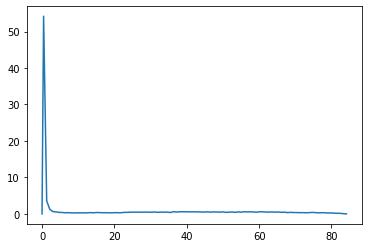

In [ ]:
plt.plot(diffDos,diffVol)

In [ ]:
def EUD(dos,vol,n):
  '''Calculates the Equivalent Uniform dose based on the differential DVH 
  parameters and a seriality parameter n.
  '''

  #Initiate sum of dose contributions as 0
  sum = 0
  #Add contributions from each voxel
  for k in range(len(dos)):
    sum += (dos[k]**(1/n))*(vol[k]/100)
  
  #Raise dose contributions to the power of n to get the EUD
  EUD = sum**n
  return EUD



In [ ]:
def NTCP(EUD,m,D50):
  '''Returns the NTCP for a given EUD, dose response curve gradient m and the
  dose for a 50% probability of complication
  '''

  #Determine upper limit of integral
  t = (EUD - D50)/(m*D50)

  #Calculate the NTCP
  NTCP = 1/np.sqrt(2*np.pi) * quad(lambda x: np.exp(-(x**2)/2),-np.inf,t)[0]
  return NTCP

In [ ]:
bsEUD = EUD(diffDos,diffVol,0.70)
print(bsEUD)
bsNTCP = NTCP(bsEUD,0.18,46)
print(bsNTCP)

44.278158812471325
0.4176332879250351
